# NLP - First Year Project 3

### Group E2 Authors: <br>
- *Franciszek Michal Liszka     frli@itu.dk* <br>
- *Gusts Gustavs Grinbergs      gugr@itu.dk* <br>
- *Jannik Elsäßer               jels@itu.dk* <br>
- *Juraj Septak                 juse@itu.dk* <br>
- *Mirka Katuscakova            katu@itu.dk* <br>

The notebook is organized by the objectives of each task (the bullet/check points). <br>

You may notice that libraries are being imported multiple times, this is because the final notebook is a merged version of all task notebooks (to avoid version changes, the merging is automated, see `/work/twitter-nlp/notebooks/combine-notebooks.ipynb` for more info). We hope this will however also provide clarity as to which libraries are being imported for which code (instead of having a large import block at the beginning). <br> 

Please also look at the `boilerplate.py` file. We created this file to save all the functions which we would use often throughout the project. This file is needed to run code throughout the notebook. If there are issues with python not being able to find the boilerplate.py file, please change: ` 
sys.path.insert(0, '/work/twitter-nlp')` to the correct path of the twitter-nlp unzipped repository. <br>

Our binary classification task is the hatespeech dataset, and our multi classification task is the emoji dataset.

## Task 1: Preprocessing

Output requirement: one output line per input line, with spaces between tokens.

- [x] Use the training set of one of the tasks you’ve chosen to work on. Set aside a part of the training set for evaluating the tokeniser so you don’t have to touch the validation data for that.

Link to the dataset: https://github.com/cardiffnlp/tweeteval

In [ ]:
# loading the data to test
import csv 
from collections import Counter

with open('/work/twitter-nlp/data/tweeteval/datasets/hate/train_text.txt', mode ='r') as hate_file: 
    hate_data = hate_file.readlines() 
    hate_data = [i.strip("\n") for i in hate_data]

with open('/work/twitter-nlp/data/tweeteval/datasets/emoji/train_text.txt', mode='r') as emoji_file:
    emoji_data = emoji_file.readlines()
    emoji_data = [i.strip("\n") for i in emoji_data]

- [x] Start by taking a subset of the training data, look through it and discuss in your group what a good tokenisation of this subset should look like. Then design your initial Python implementation to match this ideal tokenisation, and run it over the portion of the training set that you didn’t hold out for tokeniser evaluation. Keep an eye on infrequently occurring tokens in the output that look like tokenisation errors.

##### Tokenisation Features we want to look out for:
- ".."
    - two or more dots (ignore spaces), mean ending of sentence or verbal pause
- "#topic"
    - one token block
    - if at end of sentence, create new sentence with topic list (not part of the "speech")
- "@username"
    - one token block, shows directed speech
- "https:"/"http:"
    - link, ignore
- email address
    - remove



In [ ]:
# doing some regex testing
import re

# splitting the sentence up
string = "test one two three four. well this is great. hahaha"
match = re.split(r'\s+(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)', string)

#Skipping: e-mail addresses, links, spaces
skippable_pat = re.compile(r'\s+|https.*|www.*|http.*|[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+')  

In [ ]:
def regex_tokenizer(line):
    filter_list = ['️','', '.', ',', '', '?', '!', '"', '~', "-"]
    token_list = []
    final_list = []
    word = str()

    split_line = re.split(r'\s+|https.*|www.*|http.*|[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+', line)
    for i in split_line:
        for t in i :
            if t not in filter_list:
                word += t
        if len(word) > 0:
            final_list.append(word)
        else:
            pass
        word=""
    return final_list

In [ ]:
#testing on hate data and comparing the different tokenizers 
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

for x, i in enumerate(hate_data):
    print(i)
    print(regex_tokenizer(i))
    print(tweet_tokenizer.tokenize(i))
    print("\n")

    if x == 3:
        break

#regex_tokenizer[0

@user nice new signage. Are you not concerned by Beatlemania -style hysterical crowds crongregating on you… 
['@user', 'nice', 'new', 'signage', 'Are', 'you', 'not', 'concerned', 'by', 'Beatlemania', 'style', 'hysterical', 'crowds', 'crongregating', 'on', 'you…']
['@user', 'nice', 'new', 'signage', '.', 'Are', 'you', 'not', 'concerned', 'by', 'Beatlemania', '-', 'style', 'hysterical', 'crowds', 'crongregating', 'on', 'you', '…']


A woman who you fucked multiple times saying yo dick small is a compliment you know u hit that spot 😎 
['A', 'woman', 'who', 'you', 'fucked', 'multiple', 'times', 'saying', 'yo', 'dick', 'small', 'is', 'a', 'compliment', 'you', 'know', 'u', 'hit', 'that', 'spot', '😎']
['A', 'woman', 'who', 'you', 'fucked', 'multiple', 'times', 'saying', 'yo', 'dick', 'small', 'is', 'a', 'compliment', 'you', 'know', 'u', 'hit', 'that', 'spot', '😎']


@user @user real talk do you have eyes or were they gouged out by a rapefugee? 
['@user', '@user', 'real', 'talk', 'do', 'you', 

In [ ]:
# and again for emoji_data
for x, i in enumerate(emoji_data):
    print(i)
    print(regex_tokenizer(i))
    print(tweet_tokenizer.tokenize(i))
    print("\n")

    if x == 3:
        break

Sunday afternoon walking through Venice in the sun with @user ️ ️ ️ @ Abbot Kinney, Venice 
['Sunday', 'afternoon', 'walking', 'through', 'Venice', 'in', 'the', 'sun', 'with', '@user', '@', 'Abbot', 'Kinney', 'Venice']
['Sunday', 'afternoon', 'walking', 'through', 'Venice', 'in', 'the', 'sun', 'with', '@user', '️', '️', '️', '@', 'Abbot', 'Kinney', ',', 'Venice']


Time for some BBQ and whiskey libations. Chomp, belch, chomp! (@ Lucille's Smokehouse Bar-B-Que) 
['Time', 'for', 'some', 'BBQ', 'and', 'whiskey', 'libations', 'Chomp', 'belch', 'chomp', '(@', "Lucille's", 'Smokehouse', 'BarBQue)']
['Time', 'for', 'some', 'BBQ', 'and', 'whiskey', 'libations', '.', 'Chomp', ',', 'belch', ',', 'chomp', '!', '(', '@', "Lucille's", 'Smokehouse', 'Bar-B-Que', ')']


Love love love all these people ️ ️ ️ #friends #bff #celebrate #blessed #sundayfunday @ San… 
['Love', 'love', 'love', 'all', 'these', 'people', '#friends', '#bff', '#celebrate', '#blessed', '#sundayfunday', '@', 'San…']
['Love', 'lov

In [ ]:
# tokenizing nltk.TweetTokenizer based on our previuosly defined filter

filter_list = ['️','', '.', ',', '', '?', '!', '"', '~', "-"]
lst = [x for x in tweet_tokenizer.tokenize(hate_data[14]) if x not in filter_list]

In [ ]:
lst

['Essential',
 'reading',
 'for',
 'those',
 'in',
 'Scribner',
 'Nebraska',
 'who',
 'are',
 'considering',
 'an',
 'anti-immigrant',
 'ballot',
 'measure']

- [x] Once you’re done, compare your tokeniser’s output with the baseline tokenisationyou get from the social media tokeniser in the NLTK library (nltk.tokenize.TweetTokenizer), using the data you’ve set aside for this purpose.

Since we would be rewriting the loading, and tokenizing code a lot we decided to add this to a file `boilerplate.py` and create the function `boilerplate.load_and_tokenize(file_directory, tokenizer)`.  

In [ ]:
import sys
sys.path.insert(0, '/work/twitter-nlp')
from boilerplate import load_and_tokenize

In [ ]:
file = "/work/twitter-nlp/data/tweeteval/datasets/hate/train_text.txt"
tokenizers = ["Regex", "NLTKTweetModified", "NLTKTweet", "NLTKTreeBank"]

for i in tokenizers:
    print(i, ":")
    print(load_and_tokenize(file, i)[5])

Regex :
['Me', 'flirting', 'So', 'tell', 'me', 'about', 'your', 'father']
NLTKTweetModified :
['Me', 'flirting', 'So', 'tell', 'me', 'about', 'your', 'father', '...']
NLTKTweet :
['Me', 'flirting', '-', 'So', 'tell', 'me', 'about', 'your', 'father', '...']
NLTKTreeBank :
['Me', 'flirting-', 'So', 'tell', 'me', 'about', 'your', 'father', '...']


In [ ]:
# comparing each tokenizer based on token lengths:
for i in tokenizers:
    counter=0
    data = load_and_tokenize(file, i)
    for g in data:
        no = len(g)
        counter+=no
    print(i, counter)

Regex 185976
NLTKTweetModified 197307
NLTKTweet 213182
NLTKTreeBank 218934


Timing each implementation to see which is best:

In [ ]:
%%timeit
load_and_tokenize(file, "Regex")

431 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
load_and_tokenize(file, "NLTKTweetModified")

1.06 s ± 126 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
load_and_tokenize(file, "NLTKTweet")

966 ms ± 21.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
load_and_tokenize(file, "NLTKTreeBank")

878 ms ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- [x] Consider using the difflib package in Python, or the diff utility in the Unix shell, to compare the output of the two tokenisers efficiently.

Looking at the most common tokens in `train_text.txt`using bash scripts:

```
(venv) root@deepnote:~/work/data # tr ' ' '\n'  <~/work/data/train_text.txt | sort | uniq -c | sort -r | head
      9 you'd
      9 Yes,
      9 y
      9 WOMAN
      9 woman,
      9 what?
      9 week.
      9 way.
      9 Wanna
      9 visa

Instead of using bash scripts we decided on using dictionaries to see which words overlap most, of the top hundred most frequent words:

In [ ]:
# returning all the frequent words for each tokenizer 
def return_freq_words(tokenizer):
    freq_word_dict = {}
    data = load_and_tokenize(file, tokenizer)
    for line in data:
        for word in line:
            freq_word_dict.setdefault(word, int())
            freq_word_dict[word] += 1
    sorted_dict = {key:value for key, value in sorted(freq_word_dict.items(), key=lambda x: x[1], reverse=True)}
    return Counter(sorted_dict)

regex_data = return_freq_words("Regex")
NLTKTweetModified_data = return_freq_words("NLTKTweetModified")
NLTKTweet_data = return_freq_words("NLTKTweet")
NLTKTreeBank_data = return_freq_words("NLTKTreeBank")

In [ ]:
# isolating the top 100
top100regex = [x[0] for x in regex_data.most_common(100)]
top100nltktm = [x[0] for x in NLTKTweetModified_data.most_common(100)]
top100nltktweet = [x[0] for x in NLTKTweet_data.most_common(100)]
top100treebank = [x[0] for x in NLTKTreeBank_data.most_common(100)]

In [ ]:
# creating an intersection function, to show the overlapping between the top 100 words
def intersection(lst1, lst2):
    """
    Given two lists, the function returns the number of overlap items
    """
    lst3 = [val for val in lst1 if val in lst2]
    return len(lst3)

In [ ]:
# loading the intersected list length between each tokenizers top 100 words, into a dataset
import pandas as pd
top100_dict = {"top100regex":top100regex, "top100nltktm":top100nltktm, "top100nltktweet":top100nltktweet, "top100treebank":top100treebank}
intersect_dict = {}

for i,j in top100_dict.items():
    intersect_dict.setdefault(i, [])
    for x,y in top100_dict.items():
            # print(i+" and "+x, intersection(j,y))
            intersect_dict[i].append(intersection(j, y))

intersect_df = pd.DataFrame.from_dict(intersect_dict, orient='index')
intersect_df.columns = [i for i in list(top100_dict.keys())]

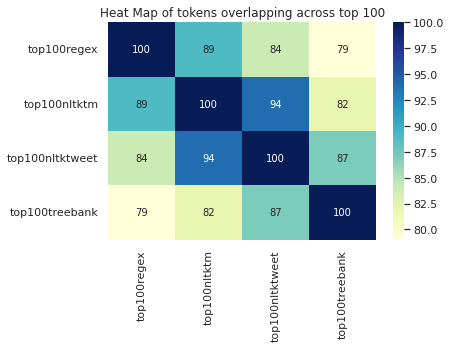

In [ ]:
# visualizing this as a heatmap
import seaborn as sns
sns.set(rc={"figure.figsize":(6, 5)})
sns.color_palette("viridis", as_cmap=True)
sns.heatmap(intersect_df, cmap="YlGnBu", annot=True, fmt='g').set_title("Heat Map of tokens overlapping across top 100");

The intersection level does not necesarrily mean anything (a higher intersection no. does not mean that it is a better tokenizer). It shows us, that the difference between each tokenizer is minimal.

In conclusion, based it's speed and the results of tokenizing tweets, compared to other tokenizers, we have decided to use the regex tokenizer. It removes all symbols that are insignificant, and gives us results from which we believe we best can deduce if a tweet is hatespeech or not. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf1f20fb-a6c0-4ea2-8567-a5a41eea1d8a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>